In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
mirna_sequence_records_path = "/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/mirna_sequence_records.csv"

data_df = pd.read_csv(mirna_sequence_records_path, dtype={"source_db_version": str, "taxon_id": str})

In [3]:
def set_plot_styles():

    styles = {
        # remove the top and right spines from the plots
        'axes.spines.right': False,
        'axes.spines.top': False,
        
        # color palette configuration
        'image.lut': 256,
        'axes.prop_cycle': mpl.cycler('color', ['#AF3029','#5E409D', '#BC5215', '#AD8301', '#66800B', '#24837B', '#205EA6' , '#A02F6F']),
        
        # retina figures configuration
        'figure.dpi': 300,
        'savefig.dpi': 300,
    }
    
    mpl.rcParams.update(styles)

In [ ]:
# Calculate how many different taxa each miRNA is found in
taxa_per_miR = data_df.groupby("miRNA_id")["taxon_id"].nunique().reset_index(name="num_taxa")
hist_counts = list(taxa_per_miR["num_taxa"])

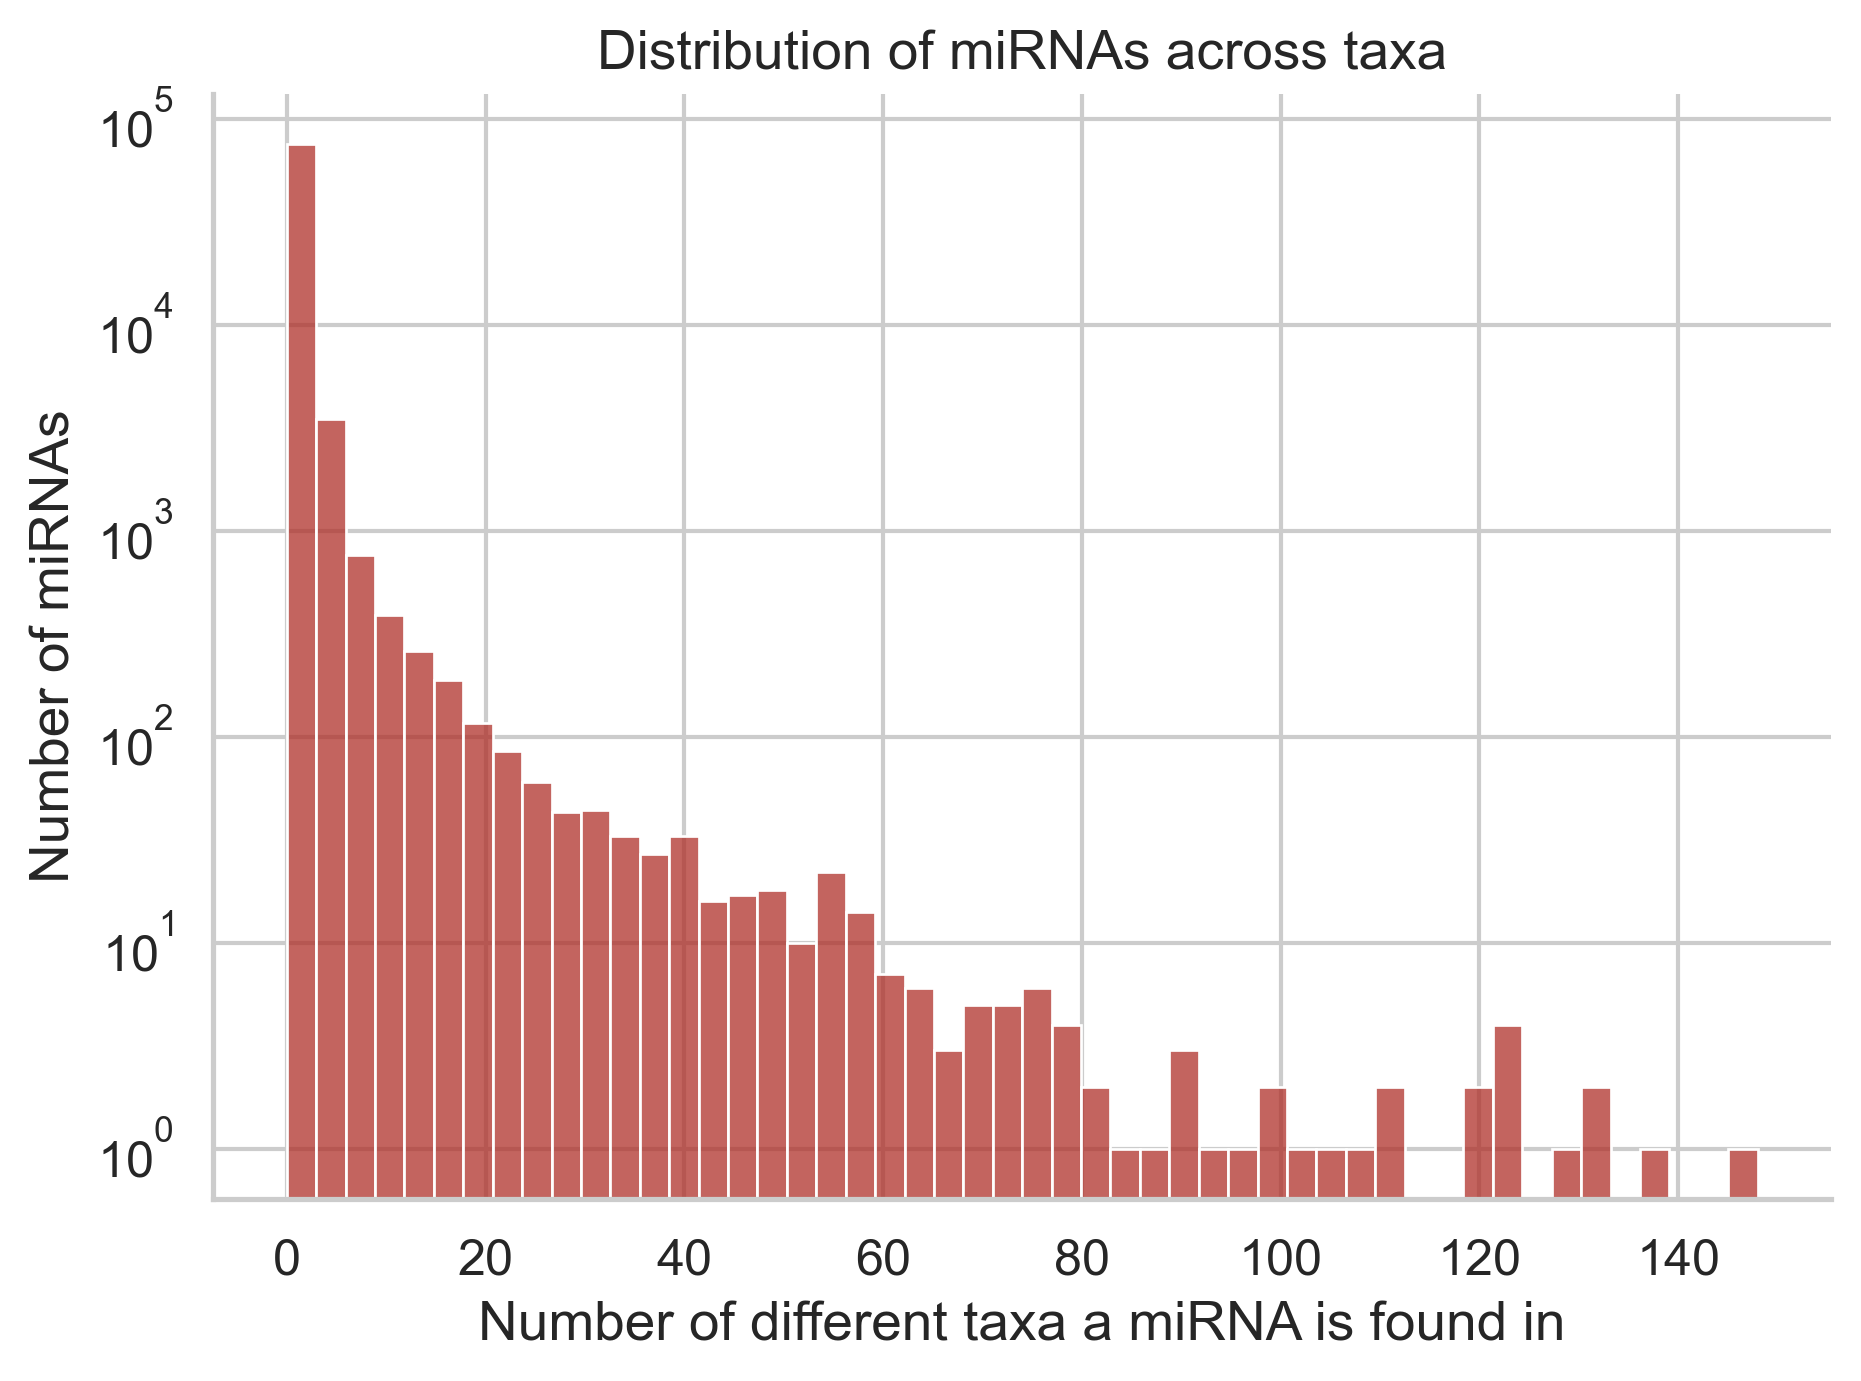

In [20]:
# Plotting
set_plot_styles()
sns.histplot(hist_counts, bins = 50)
plt.yscale('log')
plt.xlabel("Number of different taxa a miRNA is found in")
plt.ylabel("Number of miRNAs")
plt.title("Distribution of miRNAs across taxa")
plt.tight_layout()
plt.show()
plt.savefig("/home/l/leitzb/miRNA/Harmonization-of-miRNA-databases/output/plots/shared_miRNAs_per_organism.png")
plt.close()